<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo70/blob/main/RetoFinal/Entrega2/Reto_Entrega2_Clasificaci%C3%B3nEnsamblesYPresentaci%C3%B3nEjecutiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

**Maestría en Inteligencia Artificial Aplicada**

# Reto -> Entrega 2 (18/11): Clasificación-ensambles y presentación ejecutiva.



---



---



Datos generales

---

Reto -> Entrega 2 (18/11): Clasificación-ensambles y presentación ejecutiva.

---

* Nombres del equipo 70:
  * Javier Pérez Sanagustín
  * Herbert Joadan Romero Villarreal

* Matrículas:
  * A01794233
  * A01794199

* Materia: Ciencia y analítica de datos (Gpo 10)

* Profesor titular: María de la Paz Rico Fernández

Profesor tutor: Bernardo Charles Canales

Fecha: 15 de noviembre del 2022

## Clasificación


---



Se eligió y se realizó la limpieza en la base de datos de:
* Aguas subterraneas.



In [1]:
# Importamos la librería Pandas y el dataframe limpio de la entrega anterior
import pandas as pd

url_sub = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo70/main/RetoFinal/DB/df_clean_sub.csv'
df_sub = pd.read_csv(url_sub,encoding='cp1252')
df_sub.drop('Unnamed: 0', inplace=True, axis=1)
df_sub.sample(3) # Observamos una muestra aleatoria de nuestros datos

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
764,OCNOR4038,POZO VIVEROS DE CESUES,NOROESTE,SONORA,HERMOSILLO,MESA DEL SERI-LA VICTORIA,POZO,-110.85297,29.17070,90.610,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
539,DLDUR711,POZO LA PARRILLA,PACIFICO NORTE,DURANGO,NOMBRE DE DIOS,VICENTE GUERRERO-POANAS,POZO,-104.08413,23.77516,235.425,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI
450,DLBAJ77,POZO NO. 378-R,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LA PAZ,POZO,-110.37261,24.05342,168.720,...,NO,NO,NO,SI,SI,SI,SI,SI,SI,SI


Selecciona tus variables independientes X y dependiente Y (semáforo).

In [3]:
df_sub_w = df_sub.copy()
df_sub_w.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'ALC_mg/L', 'CALIDAD_ALC',
       'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_M_mg/L', 'CALIDAD_SDT_salin',
       'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR',
       'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'N_NO3_mg/L',
       'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS', 'CD_TOT_mg/L',
       'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L', 'CALIDAD_HG',
       'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN', 'FE_TOT_mg/L',
       'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

In [4]:
df_sub_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   ALC_mg/L              1068 non-null   float64
 10  CALIDAD_ALC           434 non-null    object 
 11  CONDUCT_mS/cm         1068 non-null   float64
 12  CALIDAD_CONDUC        434 non-null    object 
 13  SDT_M_mg/L            1068 non-null   float64
 14  CALIDAD_SDT_salin     434 non-null    object 
 15  FLUORUROS_mg/L       

In [5]:
variable_drop = ['CLAVE','SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
                 'ACUIFERO', 'SUBTIPO','CALIDAD_ALC', 'CALIDAD_CONDUC',  'CALIDAD_SDT_salin',
                 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3',  'CALIDAD_AS', 
                 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB',  'CALIDAD_MN', 'CALIDAD_FE' ]

df_sub_w.drop(variable_drop, inplace=True, axis=1)
df_sub_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LONGITUD              1068 non-null   float64
 1   LATITUD               1068 non-null   float64
 2   ALC_mg/L              1068 non-null   float64
 3   CONDUCT_mS/cm         1068 non-null   float64
 4   SDT_M_mg/L            1068 non-null   float64
 5   FLUORUROS_mg/L        1068 non-null   float64
 6   DUR_mg/L              1068 non-null   float64
 7   COLI_FEC_NMP/100_mL   1068 non-null   float64
 8   N_NO3_mg/L            1068 non-null   float64
 9   AS_TOT_mg/L           1068 non-null   float64
 10  CD_TOT_mg/L           1068 non-null   float64
 11  CR_TOT_mg/L           1068 non-null   float64
 12  HG_TOT_mg/L           1068 non-null   float64
 13  PB_TOT_mg/L           1068 non-null   float64
 14  MN_TOT_mg/L           1068 non-null   float64
 15  FE_TOT_mg/L          

X : CUMPLE, NUMERICAS, LONGITUD, LAT.

Y: SEMAFORO.

Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [1,2,3].

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

# Para las variables categoricas multiples
#cat_pipe = Pipeline(steps= [('bin', LabelEncoder())])
#col_cat = ['SEMAFORO']

# Para las variables continuas
cont_pipe = Pipeline(steps=[('escalaNormal', StandardScaler())])
col_cont = ['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L','FLUORUROS_mg/L', 'DUR_mg/L',
            'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
            'CR_TOT_mg/L', 'HG_TOT_mg/L','PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

# Para las variables categoricas binarias
cat_bin = Pipeline(steps= [('bin', OneHotEncoder())])
cat_bin_col = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 
          'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS',   
          'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB',       
          'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

transform_columns = ColumnTransformer(transformers=[
                                        ('var_cont', cont_pipe, col_cont),
                                        ('var_bin', cat_bin, cat_bin_col)])

Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [45]:
# Realizamos particiones
X = df_sub_w.drop('SEMAFORO', axis=1)
y = df_sub_w['SEMAFORO']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 42)

pipe_d = Pipeline(steps=[('variables', transform_columns),
                       ('modelo', RandomForestClassifier())])

pipe_d.fit(X_train, y_train)

pipe_d[1][1].feature_importances_

array([0.00731442, 0.0046261 , 0.01458874, 0.13945866, 0.        ,
       0.04906182, 0.00032174, 0.08196208, 0.03216066, 0.05688743,
       0.00331232, 0.00343823, 0.        , 0.        , 0.02368338,
       0.01462758, 0.        , 0.00268612, 0.        , 0.        ,
       0.00065524, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17466093, 0.01357749, 0.02060434, 0.        ,
       0.        , 0.00429779, 0.07866866, 0.        , 0.06501418,
       0.        , 0.        , 0.        , 0.01220876, 0.        ,
       0.        , 0.        , 0.00908027, 0.01546141, 0.11284441,
       0.        , 0.        , 0.0587972 ])

<BarContainer object of 48 artists>

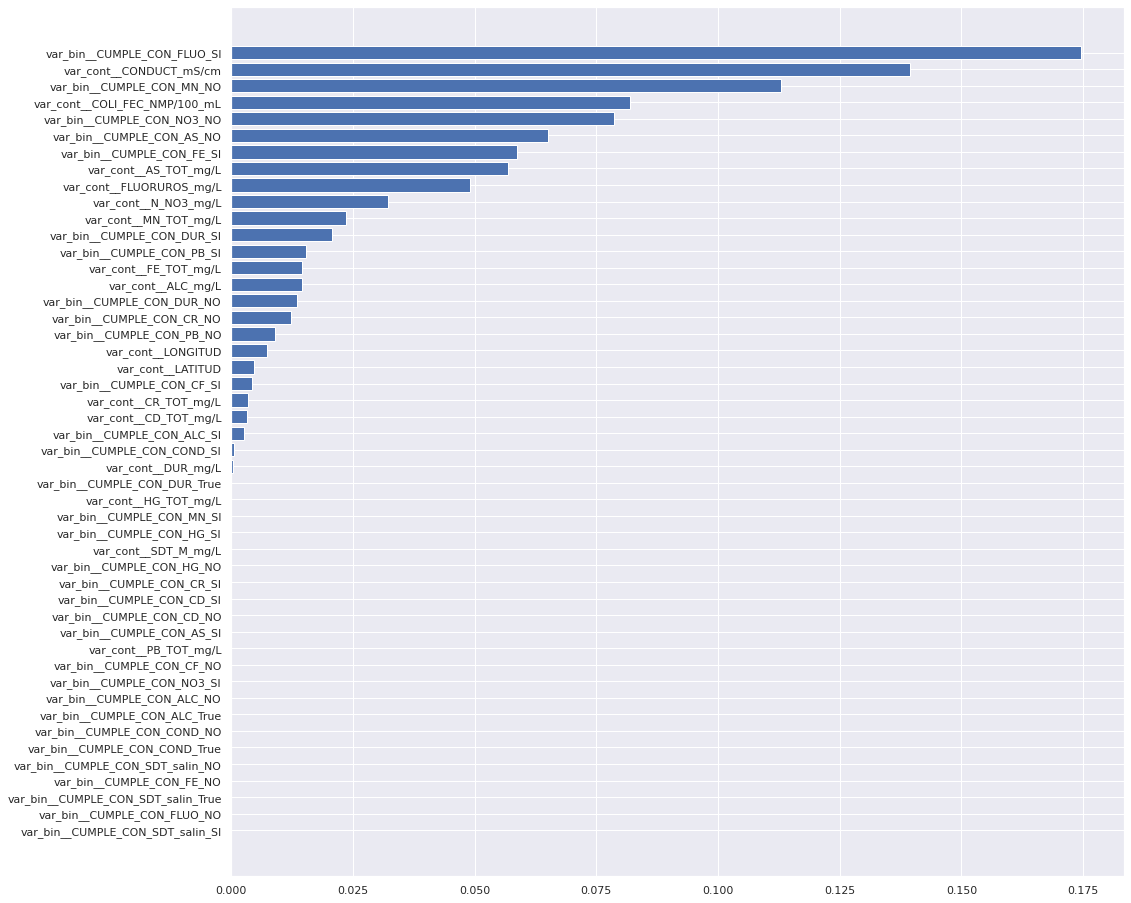

In [47]:
sns.set(rc={'figure.figsize':(16,16)})
sorted_idx = pipe_d[1][1].feature_importances_.argsort()
plt.barh(pipe_d[:-1].get_feature_names_out()[sorted_idx], pipe_d[1][1].feature_importances_[sorted_idx])

Selecciona las variables de mayor importancia.

Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split).

Explora que clasificador es el más optimo, ejemplo:

  * Decision trees
  * Random Forest.


Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.

Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.